<a href="https://colab.research.google.com/github/nikeyzdereva/add/blob/main/kr2504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Загрузка данных
df = pd.read_csv('AAP_data.csv')
df

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...,...
1254,2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
1255,2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
1256,2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP
1257,2018-02-06,108.28,113.1100,106.7450,112.20,1240784,AAP


Text(0.5, 1.0, 'close')

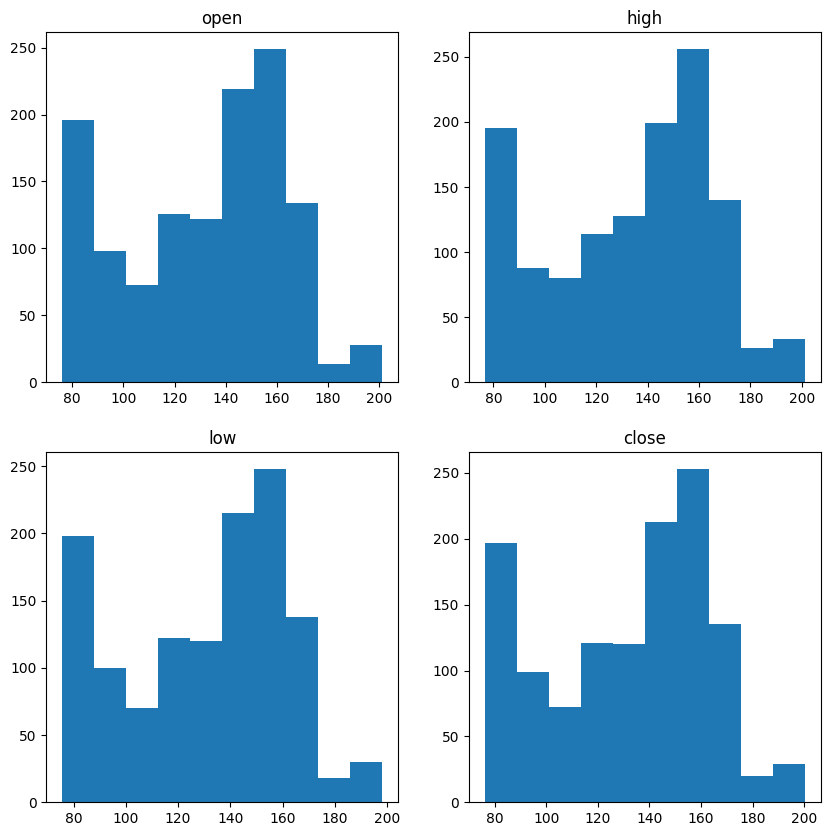

In [ ]:
# Построение графиков распределения
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(df['open'])
axs[0, 0].set_title('open')

axs[0, 1].hist(df['high'])
axs[0, 1].set_title('high')

axs[1, 0].hist(df['low'])
axs[1, 0].set_title('low')

axs[1, 1].hist(df['close'])
axs[1, 1].set_title('close')

In [ ]:
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

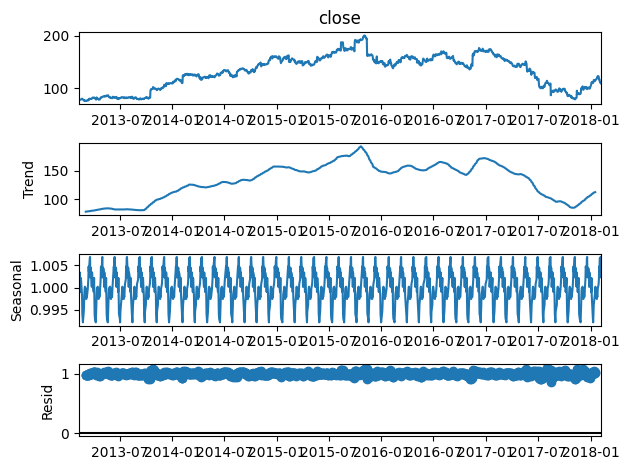

In [ ]:
result = seasonal_decompose(df['close'], model='multiplicative', period=30)
result.plot()
plt.show()

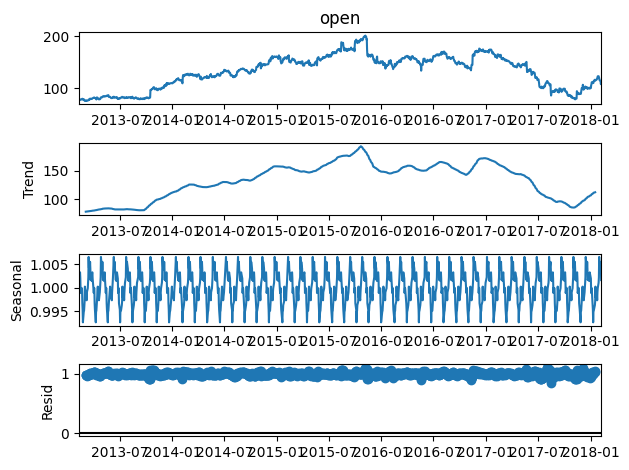

In [ ]:
result = seasonal_decompose(df['open'], model='multiplicative', period=30)
result.plot()
plt.show()

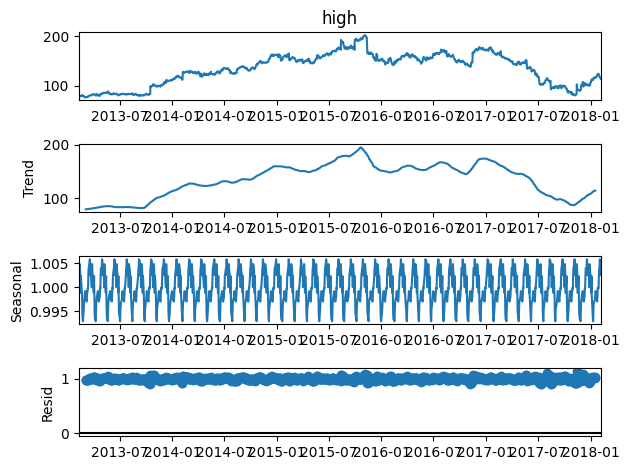

In [ ]:
result = seasonal_decompose(df['high'], model='multiplicative', period=30)
result.plot()
plt.show()

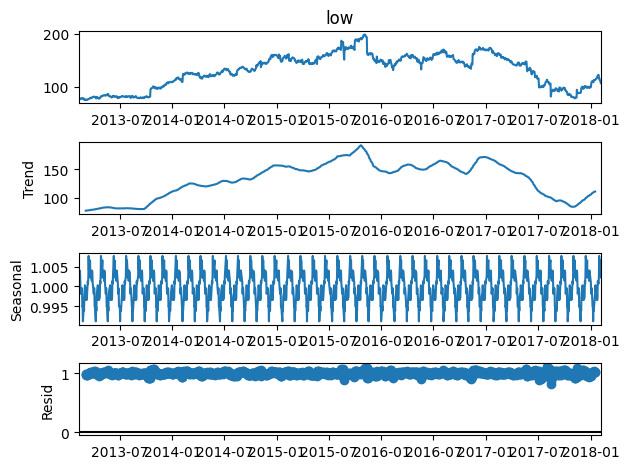

In [ ]:
result = seasonal_decompose(df['low'], model='multiplicative', period=30)
result.plot()
plt.show()

 цены закрытия/ открытия, сезонность, тренд и остатки.

<ipython-input-113-0278cc69720a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['close']
<ipython-input-113-0278cc69720a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['close']


AttributeError: ignored

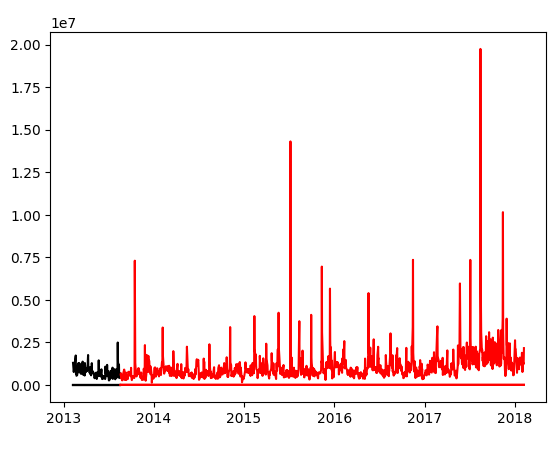

In [ ]:
df['date'] = df.index
train = df.iloc[:132]
train['train'] = train['close']
del train['date']
del train['close']
# test = df[df['date'] >= pd.to_datetime('1960–08', format='%Y-%m')]
test = df.iloc[133:]

del test['date']
test['test'] = test['close']
del test['close']
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.title(' ')
plt.ylabel('')
plt.xlabel(' ')
df.set()
plt.show()

я удалила Name

In [ ]:
df 

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137
2013-02-11,78.65,78.9100,77.2300,78.39,758016
2013-02-12,78.39,78.6300,77.5132,78.60,876859
2013-02-13,78.90,79.1300,77.8500,78.97,1038574
2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629
2018-02-02,115.92,117.1800,113.1250,113.93,1092333
2018-02-05,113.05,114.9700,109.8100,109.86,1281592


In [ ]:
# расчет MAPE
mape = (abs(df['close'] - df['open']) / df['close']).mean() * 100

In [ ]:
print("MAPE: {:.2f}%".format(mape))

MAPE: 1.01%


In [ ]:
# расчет MAPE
mape = (abs(df['high'] - df['low']) / df['high']).mean() * 100

In [ ]:
print("MAPE: {:.2f}%".format(mape))

MAPE: 2.08%


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# разбиение на тренировочную и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# вывод размеров выборок
print("Размер тренировочной выборки:", len(train_df))
print("Размер тестовой выборки:", len(test_df))

Размер тренировочной выборки: 881
Размер тестовой выборки: 378


In [ ]:
train_df = df.iloc[:1000]
test_df = df.iloc[1000:]

обучение модели

In [ ]:
df

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137
2013-02-11,78.65,78.9100,77.2300,78.39,758016
2013-02-12,78.39,78.6300,77.5132,78.60,876859
2013-02-13,78.90,79.1300,77.8500,78.97,1038574
2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629
2018-02-02,115.92,117.1800,113.1250,113.93,1092333
2018-02-05,113.05,114.9700,109.8100,109.86,1281592


In [ ]:
train_df  

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.72,78.0100,78.90,1298137
2013-02-11,78.65,78.91,77.2300,78.39,758016
2013-02-12,78.39,78.63,77.5132,78.60,876859
2013-02-13,78.90,79.13,77.8500,78.97,1038574
2013-02-14,78.66,79.72,78.5850,78.84,1005376
...,...,...,...,...,...
2017-01-23,167.08,168.63,164.2700,167.78,1416776
2017-01-24,168.80,170.98,167.7800,168.29,882432
2017-01-25,169.40,170.31,167.0000,167.50,969050


In [ ]:
test_df

,open,high,low,close,volume
date,,,,,
2017-01-30,165.35,165.3500,162.890,164.63,727006
2017-01-31,163.90,164.6800,162.270,164.24,1056018
2017-02-01,163.99,164.8900,159.700,160.59,1595047
2017-02-02,160.09,163.0500,160.000,162.34,1485466
2017-02-03,162.98,163.7000,161.920,162.75,850541
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.830,117.29,760629
2018-02-02,115.92,117.1800,113.125,113.93,1092333
2018-02-05,113.05,114.9700,109.810,109.86,1281592


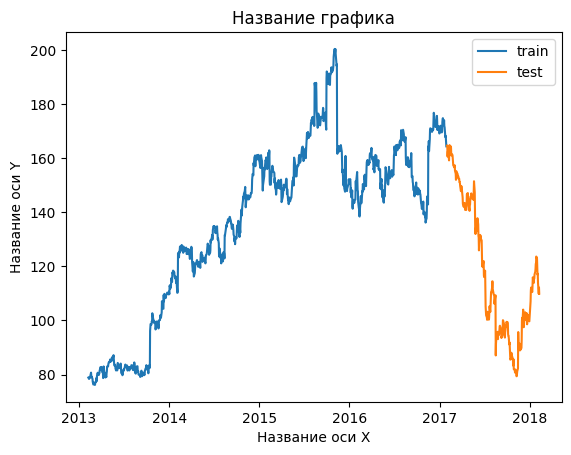

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_df['close'], label='train')
plt.plot(test_df['close'], label='test')
plt.title("Название графика")
plt.xlabel("Название оси X")
plt.ylabel("Название оси Y")
plt.legend()
plt.show()

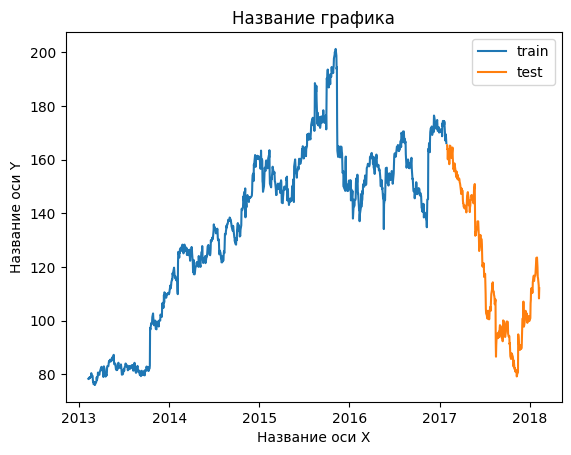

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_df['open'], label='train')
plt.plot(test_df['open'], label='test')
plt.title("Название графика")
plt.xlabel("Название оси X")
plt.ylabel("Название оси Y")
plt.legend()
plt.show()

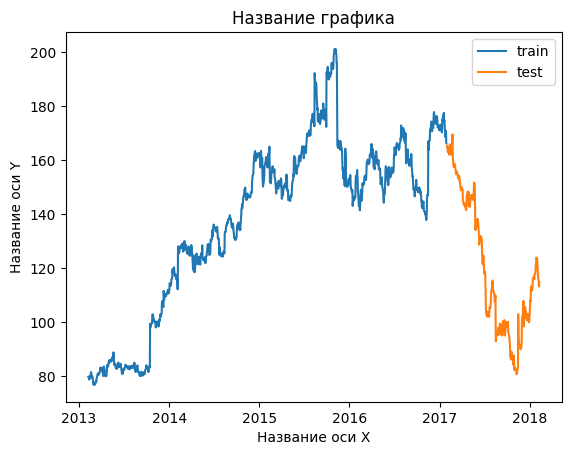

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_df['high'], label='train')
plt.plot(test_df['high'], label='test')
plt.title("Название графика")
plt.xlabel("Название оси X")
plt.ylabel("Название оси Y")
plt.legend()
plt.show()

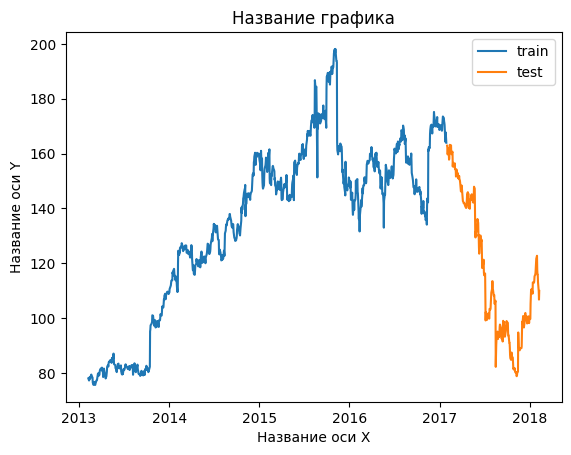

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_df['low'], label='train')
plt.plot(test_df['low'], label='test')
plt.title("Название графика")
plt.xlabel("Название оси X")
plt.ylabel("Название оси Y")
plt.legend()
plt.show()

графики тренда и теста

ищем выбросы

In [ ]:
np.random.seed(10)
df = pd.DataFrame(np.random.randint(0, 10, size=(100, 3)), columns=['A', 'B', 'C'])
df[:10]

In [ ]:
z = np.abs(stats.zscore(df))
df_clean = df[(z<3).all(axis=1)]
df_clean.shape

In [ ]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_clean.shape